1. Carregando dados...
   Dados carregados! Temos 200 clientes.

2. Calculando o número ideal de grupos (Elbow Method)...


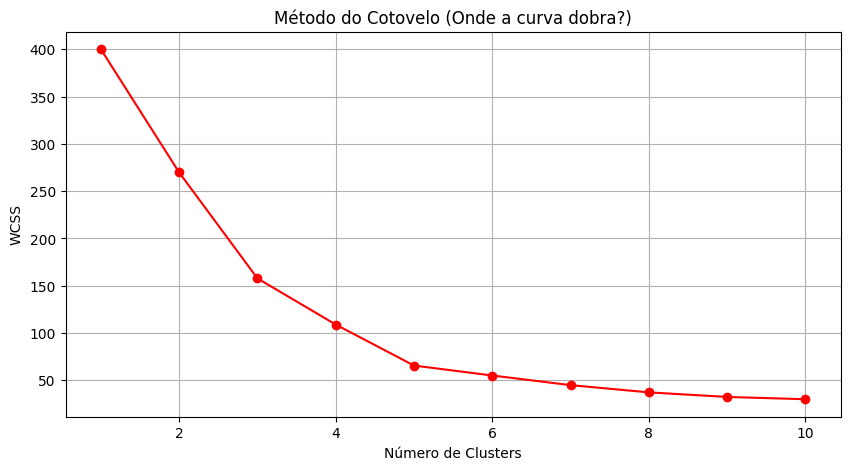

👉 DICA: Olhe o gráfico acima. A curva costuma 'dobrar' (fazer um cotovelo) no 5.
   Por isso, vamos configurar o modelo final com 5 grupos.


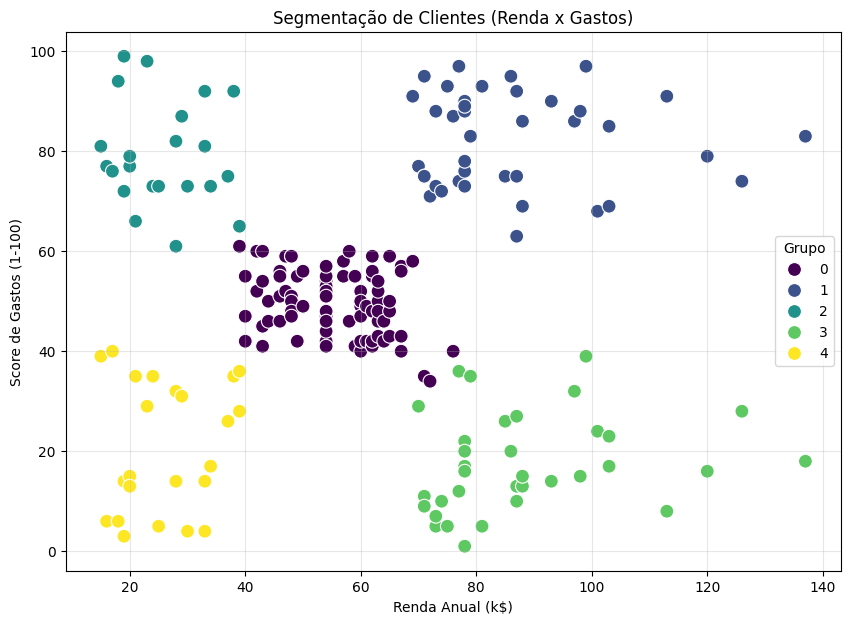


--- PERFIL DOS GRUPOS (Médias) ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. Carregar e Preparar ---
print("1. Carregando dados...")
# O código tenta achar o arquivo sozinho, igual fizemos antes
try:
    df = pd.read_csv('/content/Mall_Customers.csv')
except:
    df = pd.read_csv('Mall_Customers.csv')

print(f"   Dados carregados! Temos {len(df)} clientes.")

# Vamos focar nas duas variáveis mais importantes para o Marketing:
# Annual Income (Renda) e Spending Score (Nota de Gastos)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Padronizar os dados (StandardScaler) - OBRIGATÓRIO no K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Método do Cotovelo (Descobrir o número ideal de Clusters) ---
print("\n2. Calculando o número ideal de grupos (Elbow Method)...")
wcss = [] # Within-Cluster Sum of Square (Inércia)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do Cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Método do Cotovelo (Onde a curva dobra?)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

print("👉 DICA: Olhe o gráfico acima. A curva costuma 'dobrar' (fazer um cotovelo) no 5.")
print("   Por isso, vamos configurar o modelo final com 5 grupos.")

# --- 3. Clusterização Final (K=5) ---
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans_final.fit_predict(X_scaled)

# Adicionar o resultado na tabela original para sabermos quem é quem
df['Cluster'] = y_kmeans

# --- 4. Visualização dos Segmentos ---
plt.figure(figsize=(10, 7))

# Plotar cada grupo com uma cor
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)

plt.title('Segmentação de Clientes (Renda x Gastos)')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score de Gastos (1-100)')
plt.legend(title='Grupo')
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Análise dos Grupos (Para você nomear) ---
print("\n--- PERFIL DOS GRUPOS (Médias) ---")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())